<a id="2.0"></a>
<div style="font-family: 'Arial', sans-serif; font-size: 24px; font-style: italic; letter-spacing: 1px; background-color: #8BC34A; color: #FFFFFF; border-radius: 5px; padding: 5px; text-align: center; font-weight: bold;">
    Import Data Set
</div>


In [460]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

In [461]:
Train = pd.read_csv('DailyDelhiClimateTrain.csv',
                 index_col='date',
                 parse_dates=True
                )
Test = pd.read_csv('DailyDelhiClimateTest.csv',
                 index_col='date',
                 parse_dates=True
                )

In [462]:
df = pd.concat([Train,Test])

In [463]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1576 entries, 2013-01-01 to 2017-04-24
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1576 non-null   float64
 1   humidity      1576 non-null   float64
 2   wind_speed    1576 non-null   float64
 3   meanpressure  1576 non-null   float64
dtypes: float64(4)
memory usage: 61.6 KB


### Hiểu dữ liệu

meantemp ==> Nhiệt độ trung bình tính trung bình từ nhiều khoảng thời gian 3 giờ trong một ngày.

humidity ==> Giá trị độ ẩm trong ngày (đơn vị là gam hơi nước trên mét khối không khí).

wind_speed ==> Tốc độ gió đo bằng km/h.

meanpressure ==> Đo áp suất thời tiết (đo bằng atm)

In [464]:
df.head(5)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000,84.500,0.000,1015.667
2013-01-02,7.400,92.000,2.980,1017.800
2013-01-03,7.167,87.000,4.633,1018.667
2013-01-04,8.667,71.333,1.233,1017.167
2013-01-05,6.000,86.833,3.700,1016.500


In [465]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
meantemp,1576.000,25.222,7.345,6.000,18.500,27.167,31.143,38.714
humidity,1576.000,60.445,16.980,13.429,49.750,62.440,72.125,100.000
wind_speed,1576.000,6.899,4.511,0.000,3.700,6.364,9.262,42.220
meanpressure,1576.000,1010.593,175.243,-3.042,1001.875,1009.056,1015.200,7679.333


In [466]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [467]:
df.head(3)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000,84.500,0.000,1015.667
2013-01-02,7.400,92.000,2.980,1017.800
2013-01-03,7.167,87.000,4.633,1018.667


<Figure size 1200x1000 with 0 Axes>

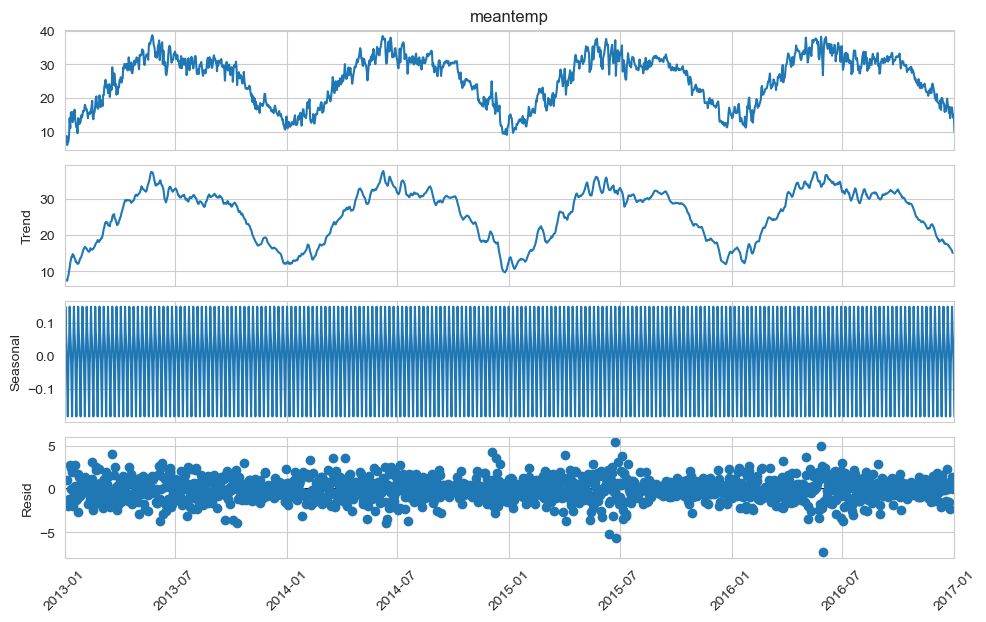

In [468]:
plt.figure(figsize=(12, 10))
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(Train["meantemp"][:], model="additive")
decomposition.plot()
plt.xticks(rotation=45)
plt.show()

- Biểu đồ thường và biểu đồ xu hướng nhìn vào thấy được xu hướng tổng quan của dữ liệu theo thời gian: nhiệt độ tăng vào mùa hè từ tháng 4 đến tháng 7 đỉnh điểm là tháng 6 hàng năm, và nhiệt độ giảm vào mùa đông và nhiệt độ thấp nhất vào tháng 1 hàng năm.
- Biểu đồ Seasonal cho thấy nhiệt độ trung bình trong ngày có xu hướng tăng theo thời gian, nhưng cũng có biến đổi theo mùa rõ ràng với nhiệt độ cao hơn vào mùa hè và thấp hơn vào mùa đông. Biểu đồ mùa vụ cho thấy biến động tăng hoặc giảm lặp đi lặp lại theo mùa theo năm.
- Biểu đồ Resid ( Biểu đồ nhiễu) cho thấy những dữ liệu nhiệt độ thay đổi bất thường khó có thể giải thích và dự đoán trước


In [469]:
df["year"] = df.index.year
df['month'] = df.index.month 
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek
df['hour'] = df.index.hour 
df["date"] = df.index.date

In [470]:
df.head(10)

,meantemp,humidity,wind_speed,meanpressure,year,month,day,dayofweek,hour,date
date,,,,,,,,,,
2013-01-01,10.000,84.500,0.000,1015.667,2013,1,1,1,0,2013-01-01
2013-01-02,7.400,92.000,2.980,1017.800,2013,1,2,2,0,2013-01-02
2013-01-03,7.167,87.000,4.633,1018.667,2013,1,3,3,0,2013-01-03
2013-01-04,8.667,71.333,1.233,1017.167,2013,1,4,4,0,2013-01-04
2013-01-05,6.000,86.833,3.700,1016.500,2013,1,5,5,0,2013-01-05
2013-01-06,7.000,82.800,1.480,1018.000,2013,1,6,6,0,2013-01-06
2013-01-07,7.000,78.600,6.300,1020.000,2013,1,7,0,0,2013-01-07
2013-01-08,8.857,63.714,7.143,1018.714,2013,1,8,1,0,2013-01-08
2013-01-09,14.000,51.250,12.500,1017.000,2013,1,9,2,0,2013-01-09


In [471]:
df.tail(10)

,meantemp,humidity,wind_speed,meanpressure,year,month,day,dayofweek,hour,date
date,,,,,,,,,,
2017-04-15,31.222,30.444,5.967,1002.444,2017,4,15,5,0,2017-04-15
2017-04-16,31.000,34.250,2.100,1003.250,2017,4,16,6,0,2017-04-16
2017-04-17,32.556,38.444,5.367,1004.444,2017,4,17,0,0,2017-04-17
2017-04-18,34.000,27.333,7.811,1003.111,2017,4,18,1,0,2017-04-18
2017-04-19,33.500,24.125,9.025,1000.875,2017,4,19,2,0,2017-04-19
2017-04-20,34.500,27.500,5.562,998.625,2017,4,20,3,0,2017-04-20
2017-04-21,34.250,39.375,6.963,999.875,2017,4,21,4,0,2017-04-21
2017-04-22,32.900,40.900,8.890,1001.600,2017,4,22,5,0,2017-04-22
2017-04-23,32.875,27.500,9.963,1002.125,2017,4,23,6,0,2017-04-23


In [472]:
df['date'].diff().dropna().iloc[0]

Timedelta('1 days 00:00:00')

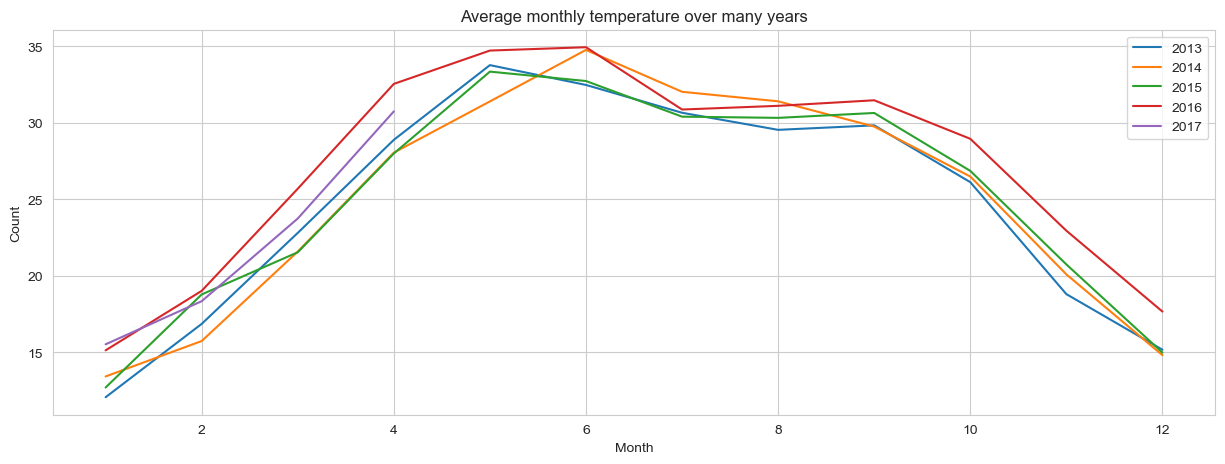

In [473]:
year_month_cnt = df.groupby(["year", "month"])["meantemp"].mean()    

plt.figure(figsize=(15,5))       
for year in year_month_cnt.index.levels[0]:
    plt.plot(year_month_cnt[year].index, year_month_cnt[year],label=year)

plt.legend()
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Average monthly temperature over many years')
plt.show()

In [474]:
df.head(1)

,meantemp,humidity,wind_speed,meanpressure,year,month,day,dayofweek,hour,date
date,,,,,,,,,,
2013-01-01,10.000,84.500,0.000,1015.667,2013,1,1,1,0,2013-01-01


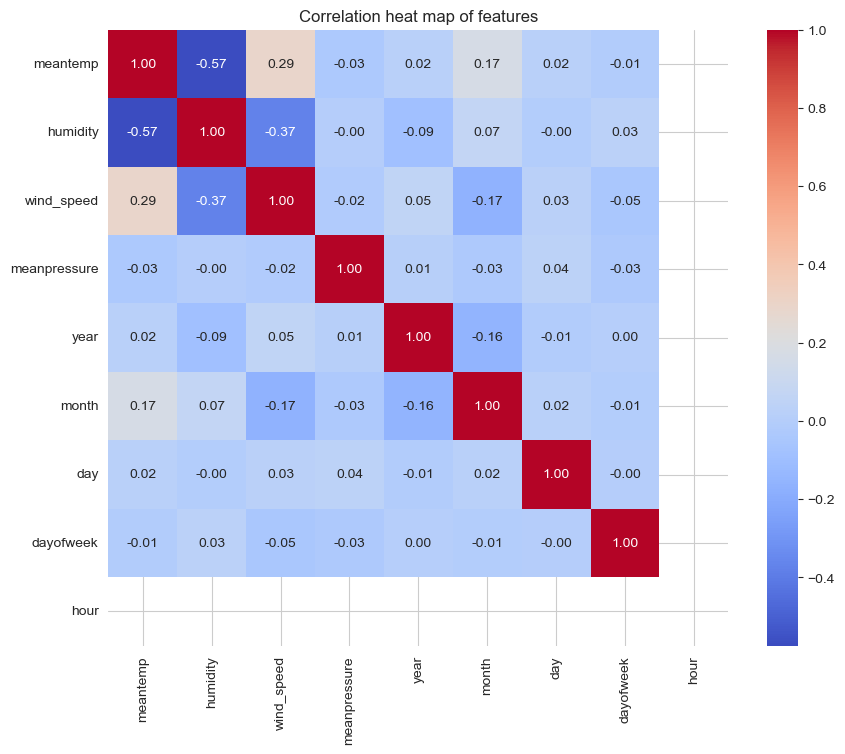

In [475]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = df[['meantemp', 'humidity', 'wind_speed', 'meanpressure', 'year', 'month', 'day', 'dayofweek', 'hour']]

correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation heat map of features')
plt.show()


In [476]:
data = df.drop(["year","month","day","dayofweek","hour","date"], axis=1)

<a id="2.0"></a>
<div style="font-family: 'Arial', sans-serif; font-size: 24px; font-style: italic; letter-spacing: 1px; background-color: #8BC34A; color: #FFFFFF; border-radius: 5px; padding: 5px; text-align: center; font-weight: bold;">
    Data Pre-Processing
</div>


In [477]:
data.shape

(1576, 4)

In [478]:
train_size = int(len(data) * 0.9)
test_size = len(data) - train_size

train, test = data.iloc[0:train_size], data.iloc[train_size:len(df)]
print(len(train), len(test))

1418 158


In [479]:
train.shape

(1418, 4)

In [480]:
test.shape

(158, 4)

In [481]:
train.head(1)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000,84.500,0.000,1015.667


<a id="2.0"></a>
<div style="font-family: 'Arial', sans-serif; font-size: 24px; font-style: italic; letter-spacing: 1px; background-color: #8BC34A; color: #FFFFFF; border-radius: 5px; padding: 5px; text-align: center; font-weight: bold;">
    Scaling
</div>


In [482]:
from sklearn.preprocessing import RobustScaler

In [483]:
f_columns = ['meanpressure', 'humidity', 'wind_speed']

f_transformer = RobustScaler()   
target_transformer = RobustScaler()   

train.loc[:, f_columns] = f_transformer.fit_transform(train[f_columns])
train['meantemp'] = target_transformer.fit_transform(train[['meantemp']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns])

test['meantemp'] = target_transformer.transform(test[['meantemp']])

In [484]:
train.head(3)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,-1.491,0.995,-1.081,0.564
2013-01-02,-1.704,1.336,-0.566,0.724
2013-01-03,-1.723,1.108,-0.280,0.789


In [485]:
def create_dataset(X, y, time_steps=1):  
   
    Xs, ys = [], []   
    for i in range(len(X) - time_steps):     
        v = X.iloc[i:(i + time_steps)].values 
        Xs.append(v)                         
        ys.append(y.iloc[i + time_steps])   
    return np.array(Xs), np.array(ys)  

In [486]:
time_steps = 24  

X_train, y_train = create_dataset(train, train.meantemp, time_steps)
X_test, y_test = create_dataset(test, test.meantemp, time_steps)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(1394, 24, 4) (1394,)
(134, 24, 4) (134,)


In [487]:
X_train

array([[[-1.49061033e+00,  9.94579803e-01, -1.08124807e+00,
          5.64428110e-01],
        [-1.70422535e+00,  1.33557859e+00, -5.65708990e-01,
          7.24089542e-01],
        [-1.72339593e+00,  1.10824607e+00, -2.79682834e-01,
          7.88951999e-01],
        ...,
        [-1.53169014e+00,  7.74825028e-01, -5.47832355e-01,
          1.02345473e+00],
        [-1.16197183e+00, -1.11771826e-01, -3.86365977e-01,
          9.26161042e-01],
        [-1.17566510e+00, -8.90385729e-02, -1.44166409e-02,
          9.26161042e-01]],

       [[-1.70422535e+00,  1.33557859e+00, -5.65708990e-01,
          7.24089542e-01],
        [-1.72339593e+00,  1.10824607e+00, -2.79682834e-01,
          7.88951999e-01],
        [-1.60015649e+00,  3.95937484e-01, -8.67881784e-01,
          6.76690055e-01],
        ...,
        [-1.16197183e+00, -1.11771826e-01, -3.86365977e-01,
          9.26161042e-01],
        [-1.17566510e+00, -8.90385729e-02, -1.44166409e-02,
          9.26161042e-01],
        [-1.305

In [488]:
y_train

array([-1.30575117, -1.271518  , -1.25586854, ..., -0.52365475,
       -0.52681473, -0.52681473])

In [489]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [490]:
X_train.shape

(1394, 24, 4)

In [491]:
y_train.shape

(1394,)

In [492]:
n_features = X_train.shape[2]

In [493]:
n_features

4

# Mô hình LSTM

In [494]:
model = Sequential()
model.add(Bidirectional(LSTM(units=128, input_shape=(time_steps, n_features))))

model.add(Dense(units=64, activation='relu'))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')


In [495]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [496]:

model.fit(X_train, y_train, 
          epochs=30, 
          batch_size=64, 
          validation_split=0.3,
          callbacks=[early_stop])

Epoch 1/30
16/16 [==============================] - 21s 224ms/step - loss: 0.1323 - val_loss: 0.0523
Epoch 2/30
16/16 [==============================] - 1s 64ms/step - loss: 0.0402 - val_loss: 0.0462
Epoch 3/30
16/16 [==============================] - 1s 74ms/step - loss: 0.0303 - val_loss: 0.0387
Epoch 4/30
16/16 [==============================] - 1s 63ms/step - loss: 0.0267 - val_loss: 0.0387
Epoch 5/30
16/16 [==============================] - 1s 73ms/step - loss: 0.0267 - val_loss: 0.0358
Epoch 6/30
16/16 [==============================] - 1s 79ms/step - loss: 0.0237 - val_loss: 0.0324
Epoch 7/30
16/16 [==============================] - 1s 77ms/step - loss: 0.0222 - val_loss: 0.0327
Epoch 8/30
16/16 [==============================] - 1s 51ms/step - loss: 0.0215 - val_loss: 0.0349
Epoch 9/30
16/16 [==============================] - 1s 58ms/step - loss: 0.0219 - val_loss: 0.0325
Epoch 10/30
16/16 [==============================] - 1s 49ms/step - loss: 0.0201 - val_loss: 0.0327
Epoch 1

<Axes: >

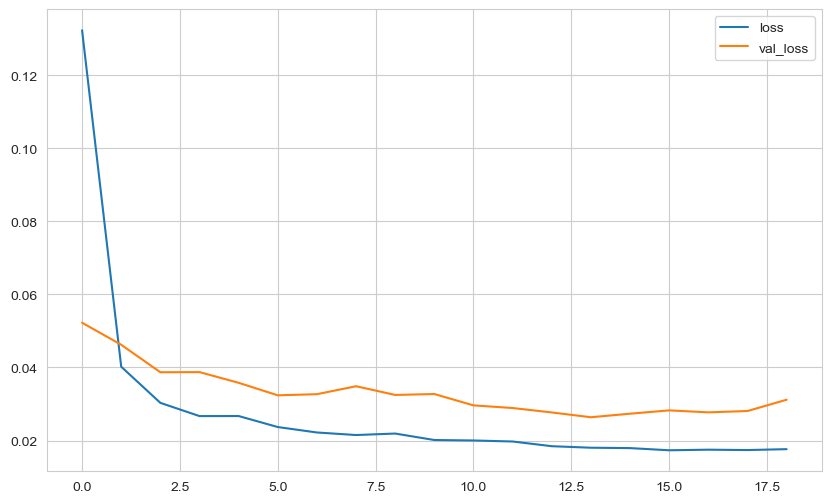

In [497]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [498]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [499]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [500]:
y_pred = model.predict(X_test)

5/5 [==============================] - 2s 9ms/step


In [501]:

eval_metrics(y_test, y_pred)

r2_score: 0.8304174386512488 
mae: 0.1716752863511885 
mse: 0.0437302547220381 
rmse: 0.20911780106446726


In [502]:
y_pred.shape

(134, 1)

In [503]:
y_train_inv = target_transformer.inverse_transform(y_train.reshape(1, -1))   
y_test_inv = target_transformer.inverse_transform(y_test.reshape(1, -1))     
y_pred_inv = target_transformer.inverse_transform(y_pred)

In [504]:
test_index = test.iloc[time_steps:].index

pred_test = pd.concat([pd.DataFrame(y_test_inv.reshape(-1, 1)),
                       pd.DataFrame(y_pred_inv)], axis = 1)
pred_test.columns=['test','prediction']

In [505]:
pred_test

,test,prediction
0,19.050,19.599
1,18.556,20.569
2,18.167,21.188
3,15.833,21.622
4,17.500,21.276
...,...,...
129,34.500,34.502
130,34.250,34.851
131,32.900,34.494
132,32.875,33.806


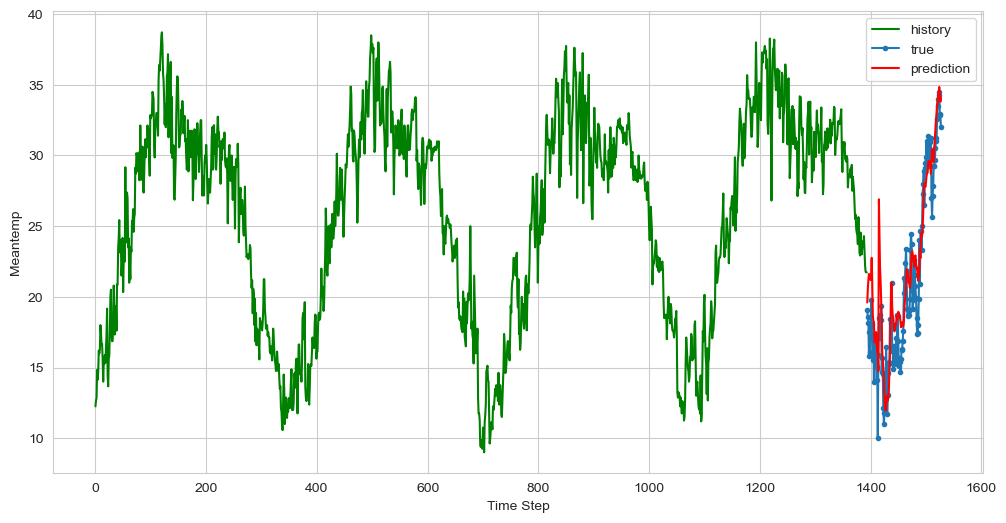

In [506]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Meantemp')
plt.xlabel('Time Step')
plt.legend()
plt.show()

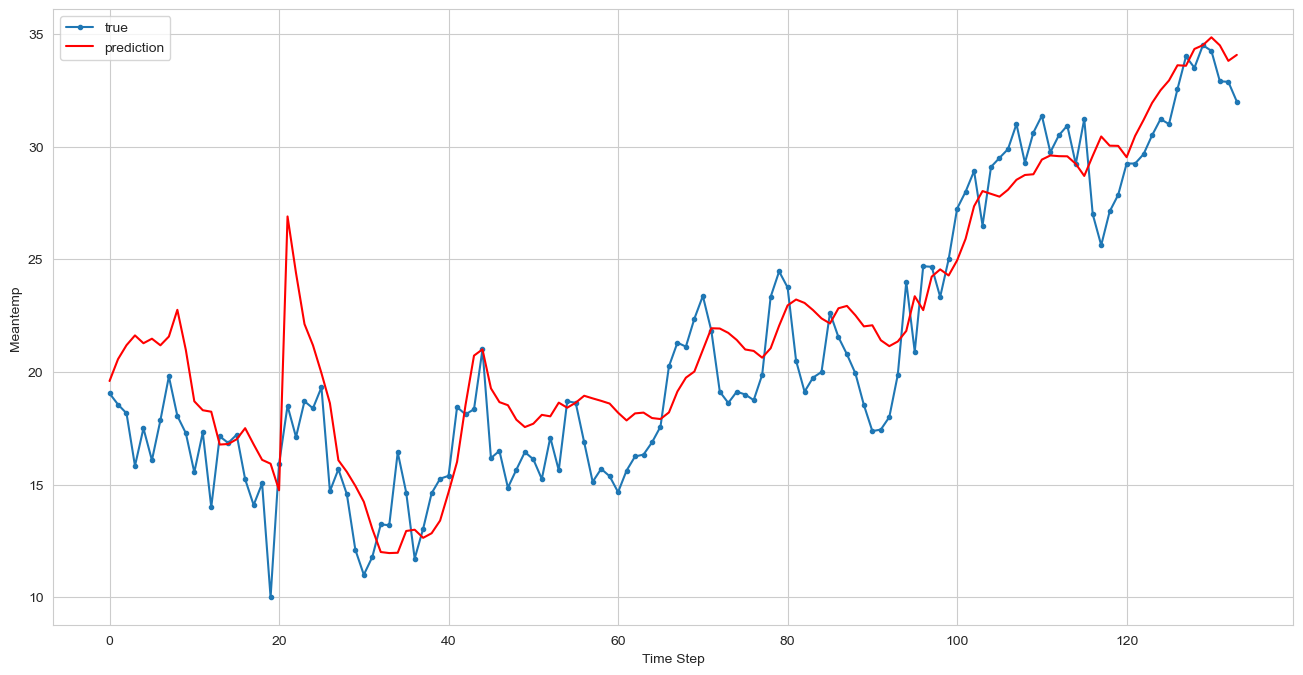

In [507]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Meantemp')
plt.xlabel('Time Step')
plt.legend()
plt.show();

# Mô hình RNN

In [508]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [509]:
model = Sequential()

model.add(SimpleRNN(units=128, activation="tanh", input_shape=(time_steps, n_features), return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=64, activation="tanh", return_sequences=True))
model.add(SimpleRNN(units=32, activation="tanh"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="tanh"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")


In [510]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)
model.fit(X_train, y_train, 
          epochs=30, 
          batch_size=64, 
          validation_split=0.3,
          callbacks=[early_stop])

Epoch 1/30
16/16 [==============================] - 14s 189ms/step - loss: 0.1204 - val_loss: 0.1084
Epoch 2/30
16/16 [==============================] - 1s 50ms/step - loss: 0.0528 - val_loss: 0.0893
Epoch 3/30
16/16 [==============================] - 1s 61ms/step - loss: 0.0406 - val_loss: 0.0657
Epoch 4/30
16/16 [==============================] - 1s 66ms/step - loss: 0.0414 - val_loss: 0.0675
Epoch 5/30
16/16 [==============================] - 1s 57ms/step - loss: 0.0350 - val_loss: 0.0661
Epoch 6/30
16/16 [==============================] - 1s 46ms/step - loss: 0.0331 - val_loss: 0.0562
Epoch 7/30
16/16 [==============================] - 1s 68ms/step - loss: 0.0311 - val_loss: 0.0684
Epoch 8/30
16/16 [==============================] - 1s 51ms/step - loss: 0.0298 - val_loss: 0.0544
Epoch 9/30
16/16 [==============================] - 1s 81ms/step - loss: 0.0282 - val_loss: 0.0613
Epoch 10/30
16/16 [==============================] - 1s 75ms/step - loss: 0.0283 - val_loss: 0.0555
Epoch 1

<Axes: >

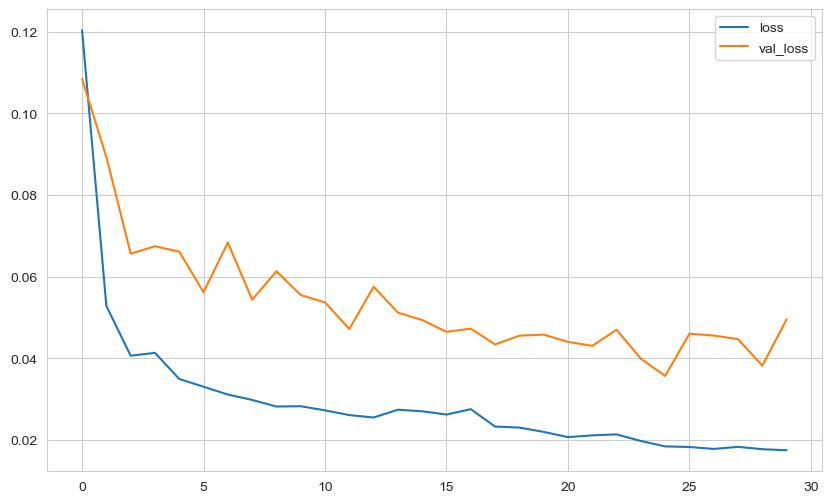

In [511]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [512]:
y_pred = model.predict(X_test)

5/5 [==============================] - 2s 24ms/step


In [513]:
eval_metrics(y_test, y_pred)

r2_score: 0.8116412104695301 
mae: 0.17364339320236397 
mse: 0.04857208064196321 
rmse: 0.22039074536369083


In [514]:
y_pred.shape

(134, 1)

In [515]:
y_train_inv = target_transformer.inverse_transform(y_train.reshape(1, -1))   
y_test_inv = target_transformer.inverse_transform(y_test.reshape(1, -1))   
y_pred_inv = target_transformer.inverse_transform(y_pred)

In [516]:
test_index = test.iloc[time_steps:].index

pred_test = pd.concat([pd.DataFrame(y_test_inv.reshape(-1, 1)),
                       pd.DataFrame(y_pred_inv)], axis = 1)
pred_test.columns=['test','prediction']

In [517]:
pred_test

,test,prediction
0,19.050,13.559
1,18.556,14.630
2,18.167,16.063
3,15.833,16.891
4,17.500,16.888
...,...,...
129,34.500,33.229
130,34.250,33.609
131,32.900,32.697
132,32.875,31.665


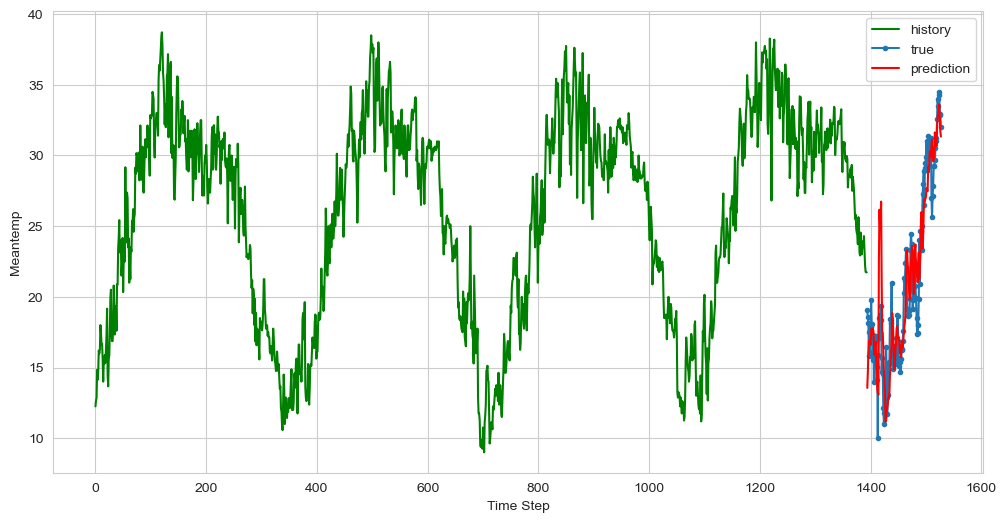

In [518]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Meantemp')
plt.xlabel('Time Step')
plt.legend()
plt.show();

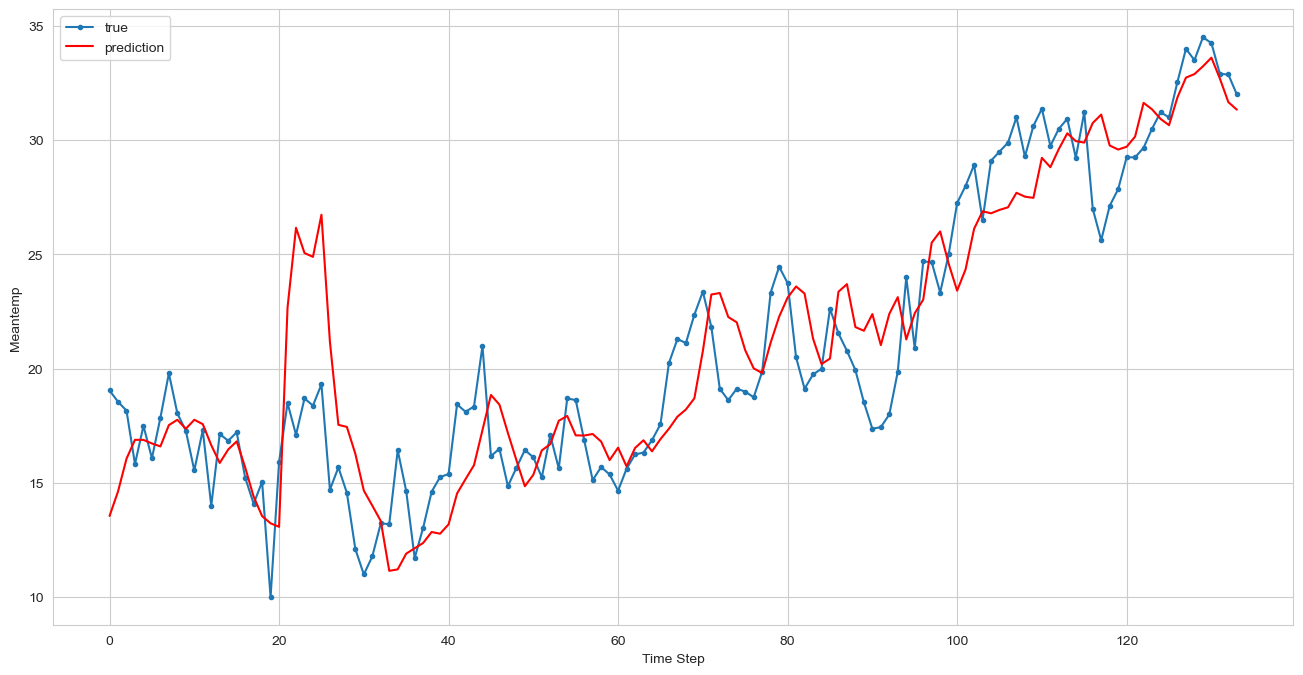

In [519]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Meantemp')
plt.xlabel('Time Step')
plt.legend()
plt.show();

# Mô hình GRU

In [520]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [521]:
model = Sequential()
model.add(Bidirectional(GRU(units=128, return_sequences=True, input_shape=(time_steps, n_features))))
model.add(Dropout(rate=0.2))
model.add(Bidirectional(GRU(units=64, return_sequences=True)))
model.add(Bidirectional(GRU(units=32, return_sequences=False)))

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

In [522]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(X_train, y_train, 
          epochs=30, 
          batch_size=64, 
          validation_split=0.3,
          callbacks=[early_stop])

Epoch 1/30
16/16 [==============================] - 65s 862ms/step - loss: 0.0986 - val_loss: 0.0458
Epoch 2/30
16/16 [==============================] - 3s 201ms/step - loss: 0.0381 - val_loss: 0.0426
Epoch 3/30
16/16 [==============================] - 3s 175ms/step - loss: 0.0372 - val_loss: 0.0558
Epoch 4/30
16/16 [==============================] - 3s 186ms/step - loss: 0.0343 - val_loss: 0.0378
Epoch 5/30
16/16 [==============================] - 3s 170ms/step - loss: 0.0310 - val_loss: 0.0349
Epoch 6/30
16/16 [==============================] - 3s 190ms/step - loss: 0.0299 - val_loss: 0.0304
Epoch 7/30
16/16 [==============================] - 3s 170ms/step - loss: 0.0269 - val_loss: 0.0295
Epoch 8/30
16/16 [==============================] - 2s 148ms/step - loss: 0.0246 - val_loss: 0.0291
Epoch 9/30
16/16 [==============================] - 3s 197ms/step - loss: 0.0256 - val_loss: 0.0290
Epoch 10/30
16/16 [==============================] - 4s 231ms/step - loss: 0.0262 - val_loss: 0.027

<Axes: >

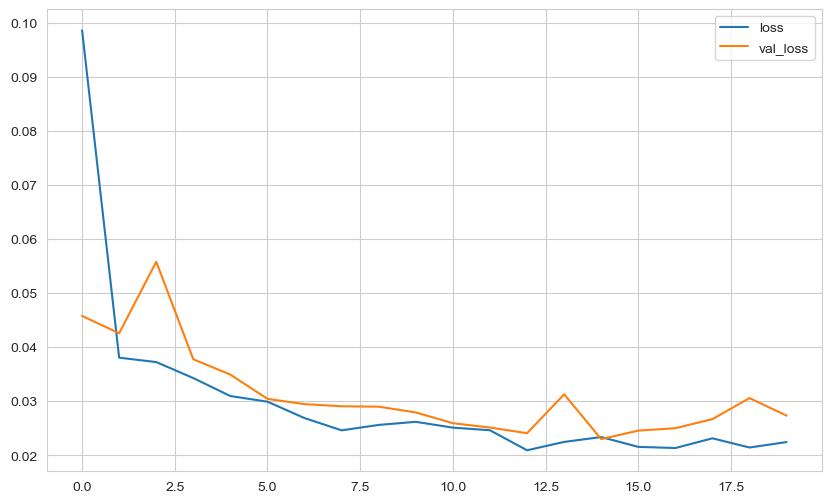

In [523]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [524]:
y_pred = model.predict(X_test)

5/5 [==============================] - 13s 29ms/step


In [525]:
eval_metrics(y_test, y_pred)

r2_score: 0.8912247131905147 
mae: 0.135503302940618 
mse: 0.028049882970331577 
rmse: 0.1674809928628666


In [526]:
y_pred.shape

(134, 1)

In [527]:
y_train_inv = target_transformer.inverse_transform(y_train.reshape(1, -1))   
y_test_inv = target_transformer.inverse_transform(y_test.reshape(1, -1))    
y_pred_inv = target_transformer.inverse_transform(y_pred)

In [528]:
test_index = test.iloc[time_steps:].index

pred_test = pd.concat([pd.DataFrame(y_test_inv.reshape(-1, 1)),
                       pd.DataFrame(y_pred_inv)], axis = 1)
pred_test.columns=['test','prediction']

In [529]:
pred_test

,test,prediction
0,19.050,19.309
1,18.556,19.425
2,18.167,18.877
3,15.833,18.308
4,17.500,17.251
...,...,...
129,34.500,33.511
130,34.250,33.916
131,32.900,33.403
132,32.875,32.873


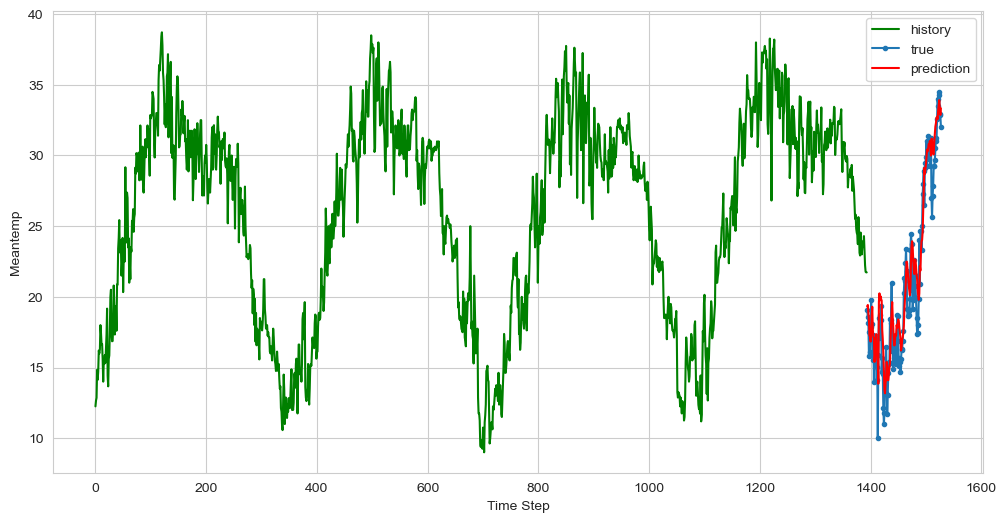

In [530]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Meantemp')
plt.xlabel('Time Step')
plt.legend()
plt.show()

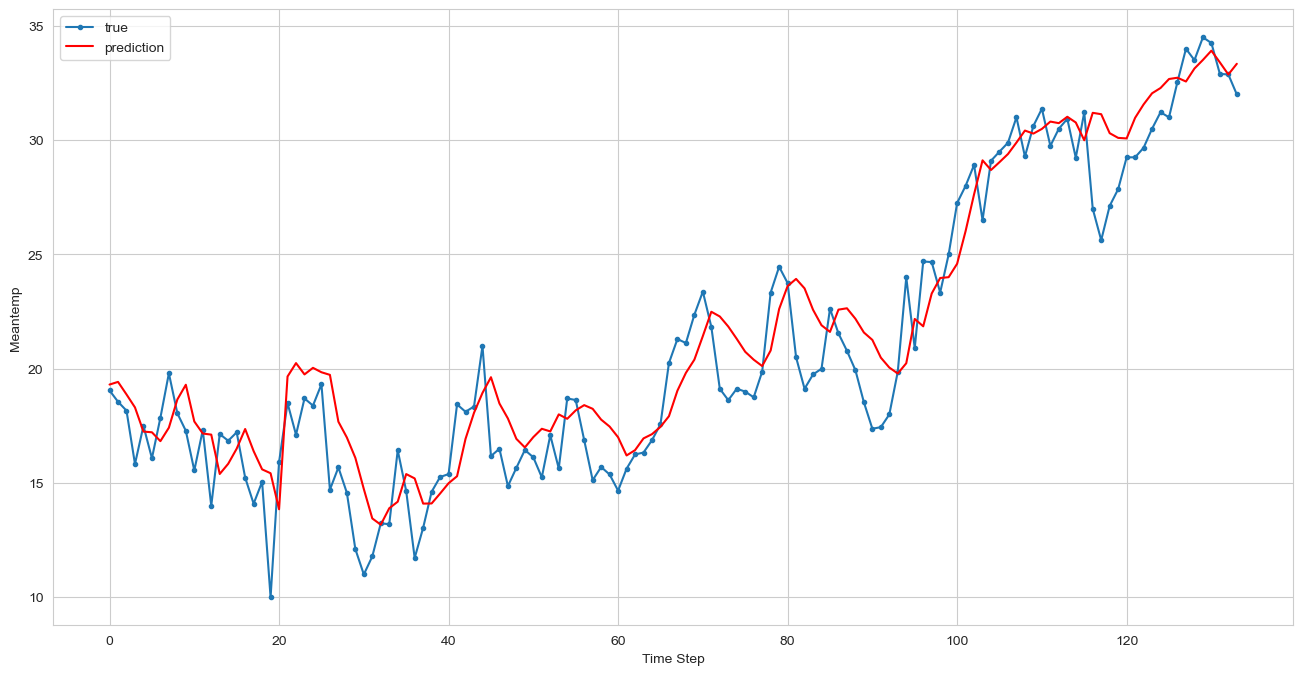

In [531]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Meantemp')
plt.xlabel('Time Step')
plt.legend()
plt.show()

In [532]:
train_size = int(len(data) * 0.9)
test_size = len(data) - train_size

train, test = data.iloc[0:train_size], data.iloc[train_size:len(df)]
print(len(train), len(test))

1418 158


In [533]:
train

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000,0.995,-1.081,0.564
2013-01-02,7.400,1.336,-0.566,0.724
2013-01-03,7.167,1.108,-0.280,0.789
2013-01-04,8.667,0.396,-0.868,0.677
2013-01-05,6.000,1.101,-0.441,0.627
...,...,...,...,...
2016-11-14,23.346,-0.086,-0.822,0.569
2016-11-15,22.240,-0.314,-0.374,0.607
2016-11-16,21.769,-0.427,0.154,0.705


In [534]:
test

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2016-11-19,20.667,-0.089,-0.590,0.325
2016-11-20,22.250,-0.124,-0.648,0.391
2016-11-21,21.538,-0.098,-0.611,0.365
2016-11-22,22.579,-0.567,0.303,0.357
2016-11-23,22.826,-0.509,0.061,0.378
...,...,...,...,...
2017-04-20,34.500,-1.597,-0.119,-0.711
2017-04-21,34.250,-1.057,0.123,-0.617
2017-04-22,32.900,-0.988,0.457,-0.488


In [535]:
X_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]
X_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]

In [536]:
X_test

,humidity,wind_speed,meanpressure
date,,,
2016-11-19,-0.089,-0.590,0.325
2016-11-20,-0.124,-0.648,0.391
2016-11-21,-0.098,-0.611,0.365
2016-11-22,-0.567,0.303,0.357
2016-11-23,-0.509,0.061,0.378
...,...,...,...
2017-04-20,-1.597,-0.119,-0.711
2017-04-21,-1.057,0.123,-0.617
2017-04-22,-0.988,0.457,-0.488


# Mô hình XGBoost

In [537]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb

In [538]:
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50,
                      learning_rate=0.008)
reg.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_test, y_test)],
       verbose=40)

[0]	validation_0-rmse:7.28986	validation_1-rmse:7.44924
[40]	validation_0-rmse:5.52796	validation_1-rmse:5.64122
[80]	validation_0-rmse:4.28666	validation_1-rmse:4.46818
[120]	validation_0-rmse:3.42162	validation_1-rmse:3.78233
[160]	validation_0-rmse:2.83652	validation_1-rmse:3.42286
[200]	validation_0-rmse:2.44513	validation_1-rmse:3.27548
[240]	validation_0-rmse:2.19109	validation_1-rmse:3.23015
[280]	validation_0-rmse:2.01931	validation_1-rmse:3.24287
[293]	validation_0-rmse:1.97625	validation_1-rmse:3.24786


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.008, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [539]:
y_pred = reg.predict(X_test)

In [540]:
eval_metrics(y_test, y_pred)

r2_score: 0.6845910934898634 
mae: 2.355367792491714 
mse: 10.429177680383743 
rmse: 3.2294237381278634


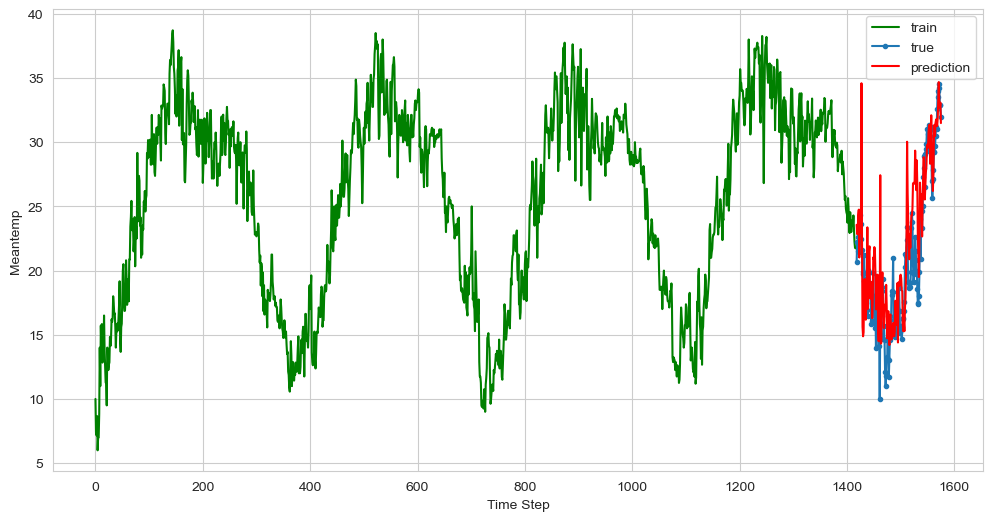

In [541]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="train")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Meantemp')
plt.xlabel('Time Step')
plt.legend()
plt.show()

In [542]:
test['prediction'] = reg.predict(X_test)

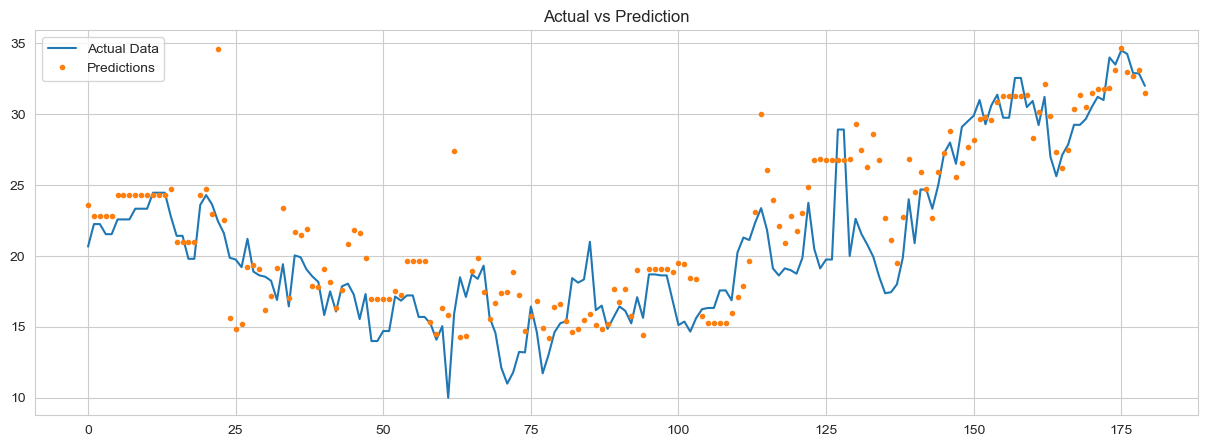

In [543]:
Test = test.merge(test[['prediction']])
res = Test[['meantemp', 'prediction']]
ax = res[['meantemp']].plot(figsize=(15,5))
res['prediction'].plot(ax=ax, style='.')
plt.legend(['Actual Data', 'Predictions'])
ax.set_title('Actual vs Prediction')
plt.show()

# Mô hình SVR

In [544]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [545]:
svr_model = SVR(C=26)
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.7056339543160548 
mae: 2.3399853033514177 
mse: 9.733383332379548 
rmse: 3.1198370682424343


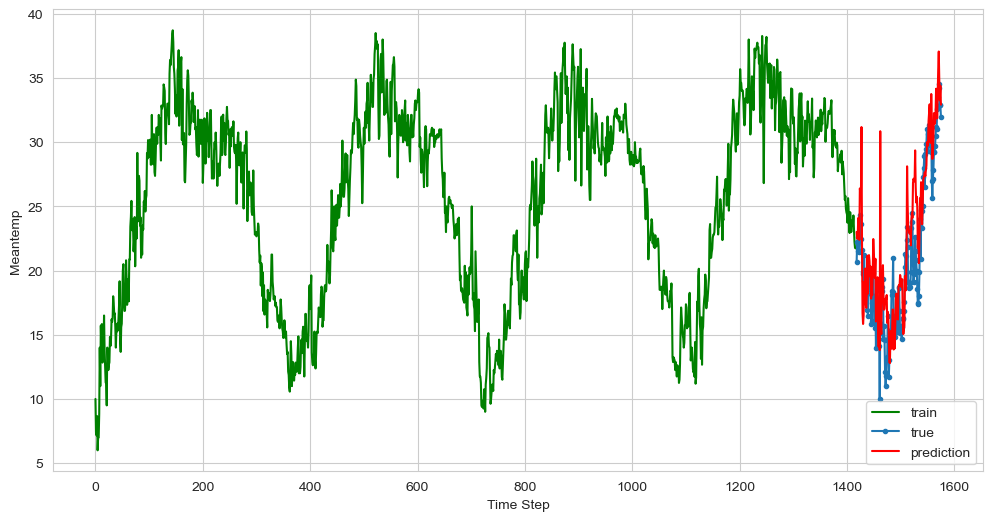

In [546]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="train")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Meantemp')
plt.xlabel('Time Step')
plt.legend()
plt.show()

In [547]:
test['prediction'] = reg.predict(X_test)

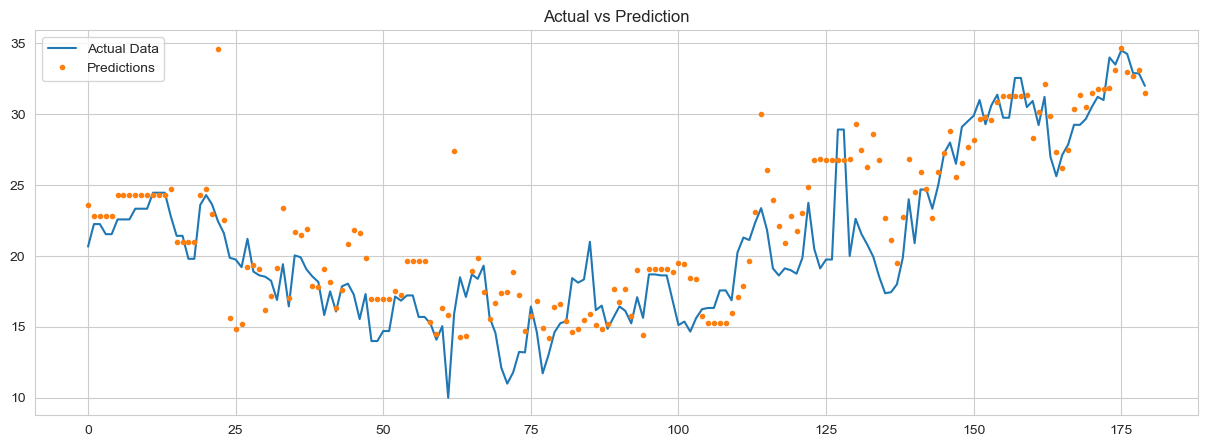

In [548]:
Test = test.merge(test[['prediction']])
res = Test[['meantemp', 'prediction']]
ax = res[['meantemp']].plot(figsize=(15,5))
res['prediction'].plot(ax=ax, style='.')
plt.legend(['Actual Data', 'Predictions'])
ax.set_title('Actual vs Prediction')
plt.show()